<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/finance/%EA%B8%88%EC%9C%B5_%EA%B3%B5%ED%95%99_6%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mission : KOSPI 100
* 코스피 100 종목
* 2021 기준
* 월별 수익률 top 5 높은 기업명, 수익률
* 월별 수익률 bottom 5 높은 기업명, 수익률
* best 업체와 worst 업체 max min 수익률(ex. 기아 현대)

In [3]:
#!pip install yfinance
#!pip install finance-datareader
#!pip install pykrx

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 48 kB 2.4 MB/s 
     |████████████████████████████████| 92 kB 346 kB/s 
     |████████████████████████████████| 51 kB 348 kB/s 
     |████████████████████████████████| 251 kB

In [4]:
import pandas as pd
import FinanceDataReader as fdr
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from pykrx import stock

## Index 지수 고유번호 출력

In [5]:
for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1022 은행
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


## KOSPI 100 기업 고유번호 리스트

In [6]:
kospi_100 = stock.get_index_portfolio_deposit_file("1034")
print(len(kospi_100), kospi_100)

100 ['005930', '373220', '000660', '035420', '207940', '035720', '005380', '006400', '051910', '000270', '005490', '105560', '323410', '068270', '028260', '055550', '012330', '066570', '096770', '377300', '034730', '086790', '011200', '015760', '259960', '051900', '034020', '032830', '017670', '352820', '009150', '302440', '003550', '010130', '316140', '033780', '010950', '003490', '329180', '036570', '018260', '011070', '000810', '251270', '030200', '090430', '361610', '003670', '024110', '034220', '326030', '086280', '011170', '009830', '009540', '018880', '032640', '035250', '097950', '004020', '011790', '000720', '006800', '028050', '010140', '021240', '005830', '011780', '000100', '180640', '047810', '267250', '071050', '161390', '241560', '003410', '006360', '005940', '139480', '078930', '036460', '016360', '029780', '128940', '002790', '004990', '271560', '008770', '282330', '008930', '007070', '000120', '042660', '023530', '012750', '030000', '001040', '019170', '285130', '0816

## KOSPI 100 기업 주가정보
* 2021년 월간 수익률을 계산해야하기 때문에 2020년 말월까지 데이터를 가져와야함

In [7]:
df=stock.get_market_ohlcv('2020-11-01', '2022-01-01','005930')

In [9]:
for ticker in kospi_100:
    name=stock.get_market_ticker_name(ticker)
    df_sam=stock.get_market_ohlcv('2020-11-01', '2022-01-01',ticker)
    df[name+'_종가'] = df_sam['종가']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [10]:
df.head()

,시가,고가,저가,종가,거래량,삼성전자_종가,LG에너지솔루션_종가,SK하이닉스_종가,NAVER_종가,삼성바이오로직스_종가,...,GS리테일_종가,CJ대한통운_종가,대우조선해양_종가,롯데쇼핑_종가,에스원_종가,제일기획_종가,CJ_종가,신풍제약_종가,SK케미칼_종가,휠라홀딩스_종가
날짜,,,,,,,,,,,,,,,,,,,,,
2020-11-02,56400,57500,56000,57400,20489076,57400,NaN,79600,285500,689831,...,32650,161000,21400,85700,82000,21200,76500,126000,231852,40600
2020-11-03,57900,58900,57600,58800,14950919,58800,NaN,81400,283000,690819,...,32900,163000,21650,86300,82700,21100,77200,134500,245196,41300
2020-11-04,58900,59000,57800,58500,21718561,58500,NaN,83200,298500,724421,...,32950,162000,22350,86500,84900,21500,77200,134500,261542,42150
2020-11-05,59000,60300,58800,60300,20639475,60300,NaN,86100,299000,771860,...,33250,166000,22750,86400,85100,21650,78800,135000,259874,43700
2020-11-06,60700,60800,59600,60100,16910230,60100,NaN,86300,301000,767906,...,32850,160000,22600,85800,83600,21200,79300,133000,272885,44350


In [12]:
kospi100_df=df.drop(['시가','고가','저가','종가','거래량'],axis=1)
kospi100_df.head()

,삼성전자_종가,LG에너지솔루션_종가,SK하이닉스_종가,NAVER_종가,삼성바이오로직스_종가,카카오_종가,현대차_종가,삼성SDI_종가,LG화학_종가,기아_종가,...,GS리테일_종가,CJ대한통운_종가,대우조선해양_종가,롯데쇼핑_종가,에스원_종가,제일기획_종가,CJ_종가,신풍제약_종가,SK케미칼_종가,휠라홀딩스_종가
날짜,,,,,,,,,,,,,,,,,,,,,
2020-11-02,57400,NaN,79600,285500,689831,67139,170500,440000,623000,51500,...,32650,161000,21400,85700,82000,21200,76500,126000,231852,40600
2020-11-03,58800,NaN,81400,283000,690819,67541,170500,459500,656000,51000,...,32900,163000,21650,86300,82700,21100,77200,134500,245196,41300
2020-11-04,58500,NaN,83200,298500,724421,72157,171500,459500,650000,51500,...,32950,162000,22350,86500,84900,21500,77200,134500,261542,42150
2020-11-05,60300,NaN,86100,299000,771860,72860,175000,484000,677000,52200,...,33250,166000,22750,86400,85100,21650,78800,135000,259874,43700
2020-11-06,60100,NaN,86300,301000,767906,74365,170500,499000,720000,51600,...,32850,160000,22600,85800,83600,21200,79300,133000,272885,44350


## 월간 수익률 계산
* 월 말일 종가 기준으로 전월 말일 종가보다 어느 정도 주가가 올랐는지

In [13]:
kospi100_df['year'] = kospi100_df.index.year
kospi100_df['month'] = kospi100_df.index.month
kospi100_df.head() #연,월 컬럼 추가 #월 중복될 경우가 있으니 연 컬럼도 추가해야함 (ex 2020/12 and 2021/12)

,삼성전자_종가,LG에너지솔루션_종가,SK하이닉스_종가,NAVER_종가,삼성바이오로직스_종가,카카오_종가,현대차_종가,삼성SDI_종가,LG화학_종가,기아_종가,...,대우조선해양_종가,롯데쇼핑_종가,에스원_종가,제일기획_종가,CJ_종가,신풍제약_종가,SK케미칼_종가,휠라홀딩스_종가,year,month
날짜,,,,,,,,,,,,,,,,,,,,,
2020-11-02,57400,NaN,79600,285500,689831,67139,170500,440000,623000,51500,...,21400,85700,82000,21200,76500,126000,231852,40600,2020,11
2020-11-03,58800,NaN,81400,283000,690819,67541,170500,459500,656000,51000,...,21650,86300,82700,21100,77200,134500,245196,41300,2020,11
2020-11-04,58500,NaN,83200,298500,724421,72157,171500,459500,650000,51500,...,22350,86500,84900,21500,77200,134500,261542,42150,2020,11
2020-11-05,60300,NaN,86100,299000,771860,72860,175000,484000,677000,52200,...,22750,86400,85100,21650,78800,135000,259874,43700,2020,11
2020-11-06,60100,NaN,86300,301000,767906,74365,170500,499000,720000,51600,...,22600,85800,83600,21200,79300,133000,272885,44350,2020,11


In [14]:
kospi100_df_month=kospi100_df.drop_duplicates(['year','month'], keep='last') #연,월 컬럼을 기준으로 중복값 제거(마지막값만 남기기) -> 말일종가만
kospi100_df_month.head() 

,삼성전자_종가,LG에너지솔루션_종가,SK하이닉스_종가,NAVER_종가,삼성바이오로직스_종가,카카오_종가,현대차_종가,삼성SDI_종가,LG화학_종가,기아_종가,...,대우조선해양_종가,롯데쇼핑_종가,에스원_종가,제일기획_종가,CJ_종가,신풍제약_종가,SK케미칼_종가,휠라홀딩스_종가,year,month
날짜,,,,,,,,,,,,,,,,,,,,,
2020-11-30,66700,NaN,97500,277500,776801,73863,181500,533000,800000,57800,...,27050,101500,78800,20750,79100,132000,284227,41300,2020,11
2020-12-30,81000,NaN,118500,292500,816333,78179,192000,628000,824000,62400,...,27400,102500,85000,20600,92100,124000,261876,43700,2020,12
2021-01-29,82000,NaN,122500,343000,783719,88516,229000,734000,917000,82500,...,24450,105500,80800,19300,94100,81000,280891,42700,2021,1
2021-02-26,82500,NaN,141500,375000,741222,97949,237000,674000,831000,79400,...,25450,118500,83000,19450,92700,83800,251534,40000,2021,2
2021-03-31,81400,NaN,132500,377000,739246,99956,218000,660000,805000,82900,...,28300,126000,81700,21250,94000,85100,167134,43150,2021,3


In [15]:
for ticker in kospi_100:
    name=stock.get_market_ticker_name(ticker)
    kospi100_df_month[name] = kospi100_df_month[name+'_종가'].pct_change(1) #월간 수익률

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
kospi100_df_month.head()

,삼성전자_종가,LG에너지솔루션_종가,SK하이닉스_종가,NAVER_종가,삼성바이오로직스_종가,카카오_종가,현대차_종가,삼성SDI_종가,LG화학_종가,기아_종가,...,GS리테일,CJ대한통운,대우조선해양,롯데쇼핑,에스원,제일기획,CJ,신풍제약,SK케미칼,휠라홀딩스
날짜,,,,,,,,,,,,,,,,,,,,,
2020-11-30,66700,NaN,97500,277500,776801,73863,181500,533000,800000,57800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30,81000,NaN,118500,292500,816333,78179,192000,628000,824000,62400,...,0.020741,-0.003012,0.012939,0.009852,0.078680,-0.007229,0.164349,-0.060606,-0.078638,0.058111
2021-01-29,82000,NaN,122500,343000,783719,88516,229000,734000,917000,82500,...,0.007257,0.015106,-0.107664,0.029268,-0.049412,-0.063107,0.021716,-0.346774,0.072611,-0.022883
2021-02-26,82500,NaN,141500,375000,741222,97949,237000,674000,831000,79400,...,0.043228,-0.023810,0.040900,0.123223,0.027228,0.007772,-0.014878,0.034568,-0.104514,-0.063232
2021-03-31,81400,NaN,132500,377000,739246,99956,218000,660000,805000,82900,...,0.053867,0.115854,0.111984,0.063291,-0.015663,0.092545,0.014024,0.015513,-0.335541,0.078750


In [17]:
kospi100_df_month=kospi100_df_month.iloc[2:,-100:] #2021 월간수익률 컬럼만 빼내기
kospi100_df_month.head()

,삼성전자,LG에너지솔루션,SK하이닉스,NAVER,삼성바이오로직스,카카오,현대차,삼성SDI,LG화학,기아,...,GS리테일,CJ대한통운,대우조선해양,롯데쇼핑,에스원,제일기획,CJ,신풍제약,SK케미칼,휠라홀딩스
날짜,,,,,,,,,,,,,,,,,,,,,
2021-01-29,0.012346,NaN,0.033755,0.172650,-0.039952,0.132222,0.192708,0.168790,0.112864,0.322115,...,0.007257,0.015106,-0.107664,0.029268,-0.049412,-0.063107,0.021716,-0.346774,0.072611,-0.022883
2021-02-26,0.006098,NaN,0.155102,0.093294,-0.054225,0.106568,0.034934,-0.081744,-0.093784,-0.037576,...,0.043228,-0.023810,0.040900,0.123223,0.027228,0.007772,-0.014878,0.034568,-0.104514,-0.063232
2021-03-31,-0.013333,NaN,-0.063604,0.005333,-0.002666,0.020490,-0.080169,-0.020772,-0.031288,0.044081,...,0.053867,0.115854,0.111984,0.063291,-0.015663,0.092545,0.014024,0.015513,-0.335541,0.078750
2021-04-30,0.001229,NaN,-0.033962,-0.046419,0.074865,0.135500,-0.027523,-0.009091,0.157764,-0.071170,...,-0.061599,-0.062842,0.296820,-0.015873,-0.002448,0.032941,0.015957,-0.179788,0.063871,0.056779
2021-05-31,-0.012270,NaN,-0.007812,0.008345,0.050996,0.083700,0.108491,-0.059633,-0.121245,0.111688,...,0.096369,-0.008746,-0.081744,-0.020161,-0.006135,0.179954,0.198953,-0.073066,-0.048783,0.195175


In [18]:
kospi100_df_month.index=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'] #index명 변경
kospi100_df_month.head()

,삼성전자,LG에너지솔루션,SK하이닉스,NAVER,삼성바이오로직스,카카오,현대차,삼성SDI,LG화학,기아,...,GS리테일,CJ대한통운,대우조선해양,롯데쇼핑,에스원,제일기획,CJ,신풍제약,SK케미칼,휠라홀딩스
1월,0.012346,NaN,0.033755,0.172650,-0.039952,0.132222,0.192708,0.168790,0.112864,0.322115,...,0.007257,0.015106,-0.107664,0.029268,-0.049412,-0.063107,0.021716,-0.346774,0.072611,-0.022883
2월,0.006098,NaN,0.155102,0.093294,-0.054225,0.106568,0.034934,-0.081744,-0.093784,-0.037576,...,0.043228,-0.023810,0.040900,0.123223,0.027228,0.007772,-0.014878,0.034568,-0.104514,-0.063232
3월,-0.013333,NaN,-0.063604,0.005333,-0.002666,0.020490,-0.080169,-0.020772,-0.031288,0.044081,...,0.053867,0.115854,0.111984,0.063291,-0.015663,0.092545,0.014024,0.015513,-0.335541,0.078750
4월,0.001229,NaN,-0.033962,-0.046419,0.074865,0.135500,-0.027523,-0.009091,0.157764,-0.071170,...,-0.061599,-0.062842,0.296820,-0.015873,-0.002448,0.032941,0.015957,-0.179788,0.063871,0.056779
5월,-0.012270,NaN,-0.007812,0.008345,0.050996,0.083700,0.108491,-0.059633,-0.121245,0.111688,...,0.096369,-0.008746,-0.081744,-0.020161,-0.006135,0.179954,0.198953,-0.073066,-0.048783,0.195175


In [19]:
kospi100_df_month=kospi100_df_month.T #데이터 핸들링을 편하게 하기 위해 컬럼&인덱스 교체

In [20]:
kospi100_df_month.head()

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
삼성전자,0.012346,0.006098,-0.013333,0.001229,-0.012270,0.002484,-0.027261,-0.022930,-0.033898,-0.058030,0.021490,0.098177
LG에너지솔루션,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK하이닉스,0.033755,0.155102,-0.063604,-0.033962,-0.007812,0.003937,-0.117647,-0.053333,-0.032864,0.000000,0.106796,0.149123
NAVER,0.172650,0.093294,0.005333,-0.046419,0.008345,0.151724,0.038323,0.012687,-0.116173,0.048969,-0.063882,-0.006562
삼성바이오로직스,-0.039952,-0.054225,-0.002666,0.074865,0.050996,-0.004735,0.058265,0.084269,-0.094301,-0.003433,0.020667,0.015748


In [21]:
for i in range(1,13):
    print(str(i) + '월 BEST 5 :', kospi100_df_month.sort_values(by=[str(i)+'월'], ascending=False).head().index.tolist()) #best 5

1월 BEST 5 : ['금호석유', 'SK이노베이션', '대한항공', '기아', '포스코케미칼']
2월 BEST 5 : ['HMM', 'S-Oil', '롯데케미칼', '한국조선해양', '포스코케미칼']
3월 BEST 5 : ['HMM', '두산밥캣', 'KB금융', '금호석유', '두산중공업']
4월 BEST 5 : ['LG', 'HMM', '한국금융지주', '대우조선해양', 'SK바이오사이언스']
5월 BEST 5 : ['두산중공업', '코웨이', 'CJ제일제당', 'HMM', 'KT']
6월 BEST 5 : ['신풍제약', '카카오', '삼성엔지니어링', 'SKC', 'SK아이이테크놀로지']
7월 BEST 5 : ['고려아연', 'SK아이이테크놀로지', '코웨이', '삼성전기', 'SK바이오사이언스']
8월 BEST 5 : ['SK바이오사이언스', '셀트리온', 'SK케미칼', '삼성증권', '신풍제약']
9월 BEST 5 : ['한국가스공사', 'S-Oil', '삼성엔지니어링', '포스코케미칼', '한화솔루션']
10월 BEST 5 : ['두산중공업', '우리금융지주', '하이브', 'LG화학', '코웨이']
11월 BEST 5 : ['LG이노텍', 'SK바이오사이언스', 'SKC', 'SK하이닉스', '하이브']
12월 BEST 5 : ['LG디스플레이', 'SK이노베이션', 'LG이노텍', 'LG전자', '한국항공우주']


In [22]:
for i in range(1,13):
    print(str(i) + '월 WORST 5 :', kospi100_df_month.sort_values(by=[str(i)+'월'], ascending=True).head().index.tolist()) #worst 5

1월 WORST 5 : ['신풍제약', '현대중공업지주', '한국전력', 'DB손해보험', 'SK바이오팜']
2월 WORST 5 : ['한미사이언스', 'SK바이오팜', 'SK', '금호석유', 'SK케미칼']
3월 WORST 5 : ['SK케미칼', 'SK이노베이션', 'SK바이오팜', '한미사이언스', '현대차']
4월 WORST 5 : ['셀트리온', '신풍제약', '한국항공우주', '오리온', '한온시스템']
5월 WORST 5 : ['삼성중공업', 'LG', 'LG화학', '금호석유', '롯데케미칼']
6월 WORST 5 : ['아모레G', '아모레퍼시픽', 'HMM', 'KT', 'CJ']
7월 WORST 5 : ['신풍제약', 'LG생활건강', 'SK이노베이션', '한화솔루션', '아모레퍼시픽']
8월 WORST 5 : ['엔씨소프트', '휠라홀딩스', '대우조선해양', 'LG화학', 'LG전자']
9월 WORST 5 : ['카카오', '아모레퍼시픽', 'HMM', '신풍제약', 'SK바이오팜']
10월 WORST 5 : ['SK아이이테크놀로지', '셀트리온', 'HMM', '포스코케미칼', 'SK바이오사이언스']
11월 WORST 5 : ['신풍제약', 'SK케미칼', '두산중공업', 'S-Oil', '한국가스공사']
12월 WORST 5 : ['카카오페이', 'SK바이오사이언스', 'SKC', 'LG화학', '현대중공업']


In [23]:
for i in range(1,13):
    print("============================== "+str(i)+"월 ==============================")
    print(str(i) + '월 BEST 5 수익률 평균 :',round(kospi100_df_month.sort_values(by=[str(i)+'월'], ascending=False)[str(i)+'월'].head().mean(),2))
    print(str(i) + '월 WORST 5 수익률 평균 :',round(kospi100_df_month.sort_values(by=[str(i)+'월'], ascending=True)[str(i)+'월'].head().mean(),2))
    print(str(i) + '월 최고 수익률 :',round(kospi100_df_month.sort_values(by=[str(i)+'월'], ascending=False)[str(i)+'월'].head().max(),2))
    print(str(i) + '월 최저 수익률 :',round(kospi100_df_month.sort_values(by=[str(i)+'월'], ascending=True)[str(i)+'월'].head().min(),2))

============================== 1월 ==============================
1월 BEST 5 수익률 평균 : 0.43
1월 WORST 5 수익률 평균 : -0.2
1월 최고 수익률 : 0.71
1월 최저 수익률 : -0.35
============================== 2월 ==============================
2월 BEST 5 수익률 평균 : 0.24
2월 WORST 5 수익률 평균 : -0.16
2월 최고 수익률 : 0.39
2월 최저 수익률 : -0.2
============================== 3월 ==============================
3월 BEST 5 수익률 평균 : 0.32
3월 WORST 5 수익률 평균 : -0.16
3월 최고 수익률 : 0.53
3월 최저 수익률 : -0.34
============================== 4월 ==============================
4월 BEST 5 수익률 평균 : 0.32
4월 WORST 5 수익률 평균 : -0.13
4월 최고 수익률 : 0.4
4월 최저 수익률 : -0.18
============================== 5월 ==============================
5월 BEST 5 수익률 평균 : 0.27
5월 WORST 5 수익률 평균 : -0.13
5월 최고 수익률 : 0.43
5월 최저 수익률 : -0.19
============================== 6월 ==============================
6월 BEST 5 수익률 평균 : 0.28
6월 WORST 5 수익률 평균 : -0.1
6월 최고 수익률 : 0.33
6월 최저 수익률 : -0.18
============================== 7월 ==============================
7월 BEST 5 수익률 평균 : 0.15
7월 WORST 5 수익률 

# 헷지(Hedge) & 상관분석(Corr.)

* <b>포트폴리오(Portfolio)</b><br>
위험을 줄이고,"투자수익을 극대화"하기 위한 일환으로 여러 종목에 분산 투자하는 방법

* High Risk, High Return : 위험을 부담할수록 더 높은 수익 가능 분산 투자 : 단순히 여러 종목을 사는 것이 아니라 위험을 분산(상관관계 0) 다양한 자산군('국내주식', '해외주식', '달러', '금', '채권', '부동산' 등)에 자본을 분배하여 포트폴리오 구성

* <b>위험의 헷지(Hedge)</b><br>
'포트폴리오'라 함은 서로 음의 상관관계를 가진 종목들로 구성하여 어떤 종목이 떨어질 때 다른 종목은 상승하여 그 손슬을 줄이는 데에 목적

* 음의 상관관계를 가진 자산들을 함께 운용해 나가면서 위험을 최소화하고, 위험이 최소화된 상태에서의 수익률을 극대화 하는 것

## Investing.com <데이터 수집>
ref : https://kr.investing.com/
<br>
### 지수 상품 :
* Nasdaq(SPY)나스닥 지수 : https://kr.investing.com/indices/nq-100	
* S&P500(GSPC)S&P 500 지수 : https://kr.investing.com/indices/us-spx-500
* DOW_J.(DJI)다우존스 지수 : https://kr.investing.com/indices/us-30-historical-data
* SBond(SHY)단기 채권 지수 : https://kr.investing.com/etfs/spdr-s-p-500	
* GBond(TLT)장기 채권 지수 : https://kr.investing.com/etfs/ishares-lehman-20-year-treas-historical-data
* KOSPI(KS11)코스피 지수 : https://kr.investing.com/indices/kospi	
* GLD : 금 관련 지수 : https://kr.investing.com/etfs/spdr-gold-trust-historical-data
* EX_US(원/달러): https://kr.investing.com/currencies/usd-krw-historical-data


* DJI<br>
3M (NYSE : MMM) American Express (NYSE : AXP) Amgen (NASDAQ : AMGN) Apple (NASDAQ : AAPL) 보잉 (NYSE : BA) Caterpillar (NYSE : CAT) Chevron (NYSE : CVX) Cisco Systems (NASDAQ : CSCO) 코카콜라 (NYSE : KO) 디즈니 (NYSE : DIS) 다우 (NYSE : DOW) Goldman Sachs (NYSE : GS) Home Depot (NYSE : HD) Honeywell International (NYSE : HON) IBM (NYSE : IBM) Intel (NASDAQ : INTC) Johnson & Johnson (NYSE : JNJ) JPMorgan Chase (NYSE : JPM) 맥도날드 (NYSE : MCD) Merck (NYSE : MRK) Microsoft (NASDAQ : MSFT) 나이키 (NYSE : NKE) Procter & Gamble (NYSE : PG) Salesforce (NYSE : CRM) 여행자 (NYSE : TRV) UnitedHealth Group (NYSE : UNH) Verizon (NYSE : VZ) 비자 (NYSE : V) Walmart (NYSE : WMT) Walgreens Boots Alliance (NASDAQ : WBA)


## Data LOAD

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
import pandas as pd
DJ = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/DJ.csv", thousands=",")
print(DJ.info())
DJ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      590 non-null    object 
 1   종가      590 non-null    float64
 2   오픈      590 non-null    float64
 3   고가      590 non-null    float64
 4   저가      590 non-null    float64
 5   거래량     590 non-null    object 
 6   변동 %    590 non-null    object 
dtypes: float64(4), object(3)
memory usage: 32.4+ KB
None


,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 3월,34707.15,33813.48,34876.87,32578.73,-,2.44%
1,2022년 2월,33879.55,35151.47,35824.28,32284.35,2.50B,-3.56%
2,2022년 1월,35131.86,36321.59,36952.65,33150.33,8.90B,-3.32%
3,2021년 12월,36338.30,34678.94,36679.44,34006.98,8.41B,5.38%
4,2021년 11월,34483.72,35833.65,36565.73,34424.44,7.23B,-3.73%


## 데이터 가공

### 자릿수 기호

In [26]:
def alphabet_handling(x):
    if 'K' in x:
        return float(x[:-1])*1000
    elif 'M' in x:
        return float(x[:-1])*1000000
    elif 'B' in x:
        return float(x[:-1])*1000000000  
    else:
        return 0 
DJ['거래량']=DJ['거래량'].apply(lambda x : alphabet_handling(x))

In [27]:
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 3월,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44%
1,2022년 2월,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56%
2,2022년 1월,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32%
3,2021년 12월,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38%
4,2021년 11월,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73%


### 변동 %

In [28]:
DJ = DJ.rename({'변동 %':'변동률'},axis=1)

In [29]:
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동률
0,2022년 3월,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44%
1,2022년 2월,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56%
2,2022년 1월,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32%
3,2021년 12월,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38%
4,2021년 11월,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73%


In [30]:
DJ['변동률']=DJ['변동률'].str.replace("%","").astype('float')

In [31]:
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동률
0,2022년 3월,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44
1,2022년 2월,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56
2,2022년 1월,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32
3,2021년 12월,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38
4,2021년 11월,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73


### 날짜
* datetime 타입 변경, 인덱스 지정, 포맷변환

In [32]:
DJ['날짜']=pd.to_datetime(DJ['날짜'], format="%Y년 %m월")

In [33]:
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동률
0,2022-03-01,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44
1,2022-02-01,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56
2,2022-01-01,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32
3,2021-12-01,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38
4,2021-11-01,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73


In [34]:
DJ=DJ.set_index("날짜",drop=True)
DJ.head()

,종가,오픈,고가,저가,거래량,변동률
날짜,,,,,,
2022-03-01,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44
2022-02-01,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56
2022-01-01,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32
2021-12-01,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38
2021-11-01,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73


### 데이터 전체 적용

In [35]:
def data_handling(df):
    if '거래량' in df.columns :
        df['거래량']=df['거래량'].apply(lambda x : alphabet_handling(x))
    df = df.rename({'변동 %':'변동률'},axis=1)
    df['변동률']=df['변동률'].str.replace("%","").astype('float')
    df['날짜']=pd.to_datetime(df['날짜'], format="%Y년 %m월")
    df=df.set_index("날짜",drop=True)
    return df

In [36]:
KOSPI = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/KOSPI.csv", thousands=",")
EXUS = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/EXUS.csv", thousands=",")
DJ = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/DJ.csv", thousands=",")
GLD = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/GLD.csv", thousands=",")
NASDAQ = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/NSDAQ.csv", thousands=",")
SP500 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/S&P500.csv", thousands=",")
SHY = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/SHY.csv", thousands=",")
TLT = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/금융공학/index_dataset/TLT.csv", thousands=",")

In [37]:
KOSPI= data_handling(KOSPI)
EXUS= data_handling(EXUS)
DJ= data_handling(DJ)
GLD= data_handling(GLD)
NASDAQ= data_handling(NASDAQ)
SP500= data_handling(SP500)
SHY= data_handling(SHY)
TLT= data_handling(TLT)

In [41]:
print("KOSPI\n",KOSPI.head())
print("EXUS\n",EXUS.head())
print("DJ\n",DJ.head())
print("GLD\n",GLD.head())
print("NASDAQ\n",NASDAQ.head())
print("SP500\n",SP500.head())
print("SHY\n",SHY.head())
print("TLT\n",TLT.head())



KOSPI
                  종가       오픈       고가       저가           거래량    변동률
날짜                                                                 
2022-03-01  2727.83  2698.31  2748.21  2605.81  8.833700e+08   1.06
2022-02-01  2699.18  2706.34  2788.27  2642.63  1.012000e+10   1.35
2022-01-01  2663.34  2998.32  3010.77  2591.53  1.093000e+10 -10.56
2021-12-01  2977.65  2860.12  3043.83  2837.03  1.067000e+10   4.88
2021-11-01  2839.01  2984.18  3034.30  2822.73  1.379000e+10  -4.43
EXUS
                  종가       오픈       고가       저가   변동률
날짜                                                  
2022-03-01  1218.68  1201.16  1247.26  1197.52  1.55
2022-02-01  1200.12  1204.75  1211.47  1189.64 -0.37
2022-01-01  1204.63  1189.80  1213.86  1184.04  1.40
2021-12-01  1187.96  1182.84  1193.81  1172.62  0.44
2021-11-01  1182.71  1174.61  1196.56  1173.18  0.70
DJ
                   종가        오픈        고가        저가           거래량   변동률
날짜                                                               

In [42]:
INDEX_NAME = ["SPY", "^GSPC", "SHY","^KS11", "TLT", "GLD", "DJI",'USDKRW=X']   #미'USDKRW=X' 일'JPYKRW=X' 영'GBPKRW=X'
SDATE = "1980-01-01"
EDATE = "2022-03-25"
dict={}

for index in INDEX_NAME:
    df = pdr.get_data_yahoo(index,start=SDATE)
    dict[index] = df['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [65]:
df = pd.DataFrame(dict)
df.columns = ["NASDAQ", "S&P500", "BOND-S","KOSPI", "BOND-G", "GLD", "DJI",'USDKRW']

In [66]:
df=df.dropna(axis=0)
df.head()

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJI,USDKRW
Date,,,,,,,,
2004-11-18,84.490036,1183.550049,61.854538,875.840027,51.479015,44.380001,10572.500000,1062.000000
2004-11-19,83.550819,1170.339966,61.756191,867.030029,51.068188,44.779999,10456.900391,1054.000000
2004-11-22,83.949272,1177.239990,61.771332,849.989990,51.334305,44.950001,10489.400391,1026.699951
2004-11-23,84.077347,1176.939941,61.763763,860.400024,51.397976,44.750000,10492.599609,1055.000000
2004-11-24,84.276573,1181.760010,61.756191,872.559998,51.397976,45.049999,10520.299805,1066.500000


In [67]:
df.describe()

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJI,USDKRW
count,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000
mean,169.524559,1925.851205,76.148225,1918.256827,93.073283,115.850613,16865.478364,1103.848892
std,96.834842,901.609561,6.667046,485.633662,30.117077,37.283569,7087.090484,99.567581
min,52.636509,676.530029,61.552395,844.200012,50.022633,41.270000,6547.049805,886.679993
25%,95.869255,1265.799988,74.340694,1647.359985,65.837662,91.130001,11333.200195,1050.350037
50%,129.995758,1552.099976,77.968819,1957.260010,93.379021,119.230003,14296.200195,1116.500000
75%,217.092522,2373.469971,79.644844,2097.020020,112.549259,140.224998,20846.549805,1156.084961
max,476.071014,4793.540039,86.157677,3305.209961,167.615067,193.889999,36799.699219,1571.400024


In [58]:
df.index.max(), df.index.min()

(Timestamp('2022-03-02 00:00:00'), Timestamp('2004-11-18 00:00:00'))

## 지수화 (변동률)

In [69]:
df_chg = df.pct_change(1) 
df_chg=df_chg.dropna(axis=0)

## 자산별 상관관계
* 월 종가 기준 자산 별 상관관계
* corr == 1 : 양의 상관관계
* corr == -1 : 음의 상관관계
* corr == 0 : 관계없음

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

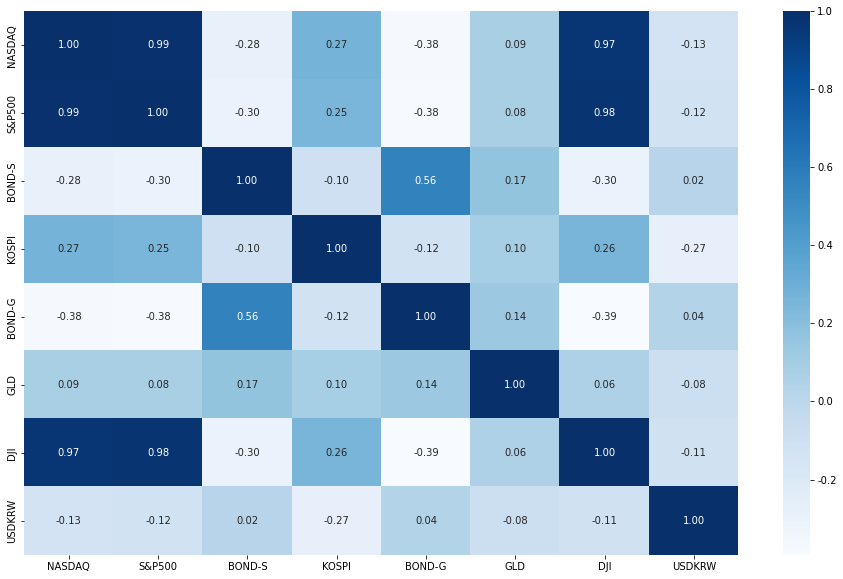

In [71]:
plt.figure(figsize=(16,10))
sns.heatmap(df_chg.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

* 포트폴리오를 구성할 때 음의 상관관계를 띄고 있는 상품을 같이 사는 것이 좋음 - 헷지(Hedge) 효과

* 환율이 오르면 국내 주가는 하락한다. (원화가치하락, 투자가치가 떨어지기 떄문에 외국 투자자가 빠져나간다.)
* KOSPI와 BOND-S/G는 약한 음의 상관관계가 있다.
* KOSPI와 USD/KRW는 BOND보다 강한 음의 상관관계가 있다.-> 환과 관련된 레버리지 상품 추천

<font color=red> 원화와 달러를 함께 운용하는게 유리

## 자산별 상관관계 분석 사이트
* ref : https://www.portfoliovisualizer.com/asset-correlations

# 금융 시장 상황에 따른 자산별 상관관계

* 호황 :  
* 횡보 :
* 불황 : 

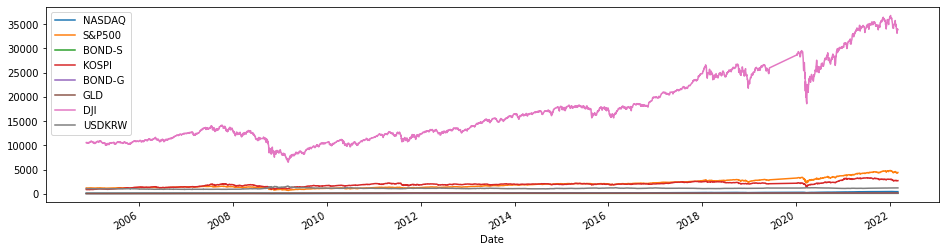

In [76]:
df[["NASDAQ", "S&P500", "BOND-S","KOSPI", "BOND-G", "GLD", "DJI",'USDKRW']].plot(figsize=(16,4))

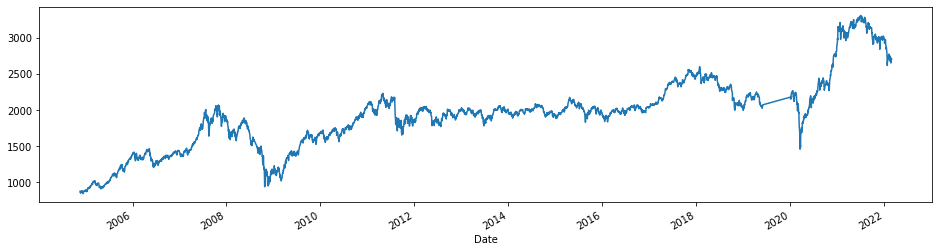

In [77]:
df['KOSPI'].plot(figsize=(16,4))

* 불황 : 주가 하락, 시장유동성 증가, 시중통화량 증가, 금리 인상, 채권 하락, 개인(매수세) / 외인(매도세) <br>--> 물가 인상 : 이자부담, 부동산 매도, 부동산가격(폭락) -- 대출상환불가 -> 뱅크런<br>--> 조기 금리인상 통화정책
    - 2020 : 코로나
    - 2008 ~ 2010 : 리먼브라더스 파산(서브프라임 MBS 모기지 채권) - 금융대란 ==> 빅쇼트
    - 1998 : IMF

* 횡보 :
    - 2012~2017 : 가장 Nomal한 데이터
